In [22]:
# import numpy as np
import random
import operator
import math
from collections import Counter

In [71]:
# split data
def split(data,ratio=0.2):
    n_total = len(data)
    offset = int(n_total * ratio)
    random.shuffle(data)
    list_1 = data[:offset]
    list_2 = data[offset:]
    return list_1,list_2

# calculate euclidean distance
def euc_distance(a, b, n=4):
    distance = 0
    for i in range(n):      
        distance += pow((float(a.split()[i]) - float(b.split()[i])), 2) 
    return math.sqrt(distance)

# calculate normalized euclidean distance
def normalized_euclidean(a, b, n=4):
    sumnum = 0
    for i in range(n):
        avg = (float(a.split()[i]) - float(b.split()[i])) / 2
        si = ((float(a.split()[i]) - avg) ** 2 + (float(b.split()[i]) - avg) ** 2) ** 0.5
        sumnum += ((float(a.split()[i]) - float(b.split()[i])) / si) ** 2
    return sumnum ** 0.5

# calculate cosine similarity
def cos_similarity(a, b, n=4):
    mult=0
    x_norm=0
    y_norm=0 
    sim = 0

    for i in range(n):
        mult += float(a.split()[i]) * float(b.split()[i])
        x_norm += float(a.split()[i]) * float(a.split()[i])
        y_norm += float(b.split()[i]) * float(b.split()[i])
    sim = mult / math.sqrt(x_norm * y_norm)
    return sim

def kNN_euc_distance(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for i in range(len(trainSet)):
        dist = euc_distance(trainSet[i], testInstance)
        distances.append((trainSet[i], dist))
    distances.sort(key = operator.itemgetter(1))
    candidate = []
    for j in range(k):
        candidate.append(distances[j][0])
    return candidate

def kNN_cos_similarity(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for i in range(len(trainSet)):
        dist = cos_similarity(trainSet[i], testInstance)
        distances.append((trainSet[i], dist))
    distances.sort(key = operator.itemgetter(1), reverse = True)
    candidate = []
    for j in range(k):
        candidate.append(distances[j][0])
    return candidate

def kNN_normalized_euclidean(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for i in range(len(trainSet)):
        dist = normalized_euclidean(trainSet[i], testInstance)
        distances.append((trainSet[i], dist))
    distances.sort(key = operator.itemgetter(1))
    candidate = []
    for j in range(k):
        candidate.append(distances[j][0])
    return candidate

# vote
def voteResult(candidate):
    votes = {}
    for i in range(len(candidate)):
        label = candidate[i].split()[4]
        if label in votes:
            votes[label] += 1
        else:
            votes[label] = 1
    votes_sorted = sorted(votes.items(), key = operator.itemgetter(1), reverse = True)
    return votes_sorted[0][0]


In [77]:
file = 'iris.data'
f = open(file, 'r')
lines = f.readlines()

testSet,devSet = split(lines)

In [111]:
# k = 1
# euclidean distance
correct_euc1 = 0
accuracy_euc1 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 1)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc1 += 1
accuracy_euc1 = correct_euc1/len(testSet) * 100
print(str(accuracy_euc1) + '%')

# normalized_euclidean distance
correct_nor1 = 0
accuracy_nor1 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 1)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor1 += 1
accuracy_nor1 = correct_nor1/len(testSet) * 100
print(str(accuracy_nor1) + '%')

# cosine_distance
correct_cos1 = 0
accuracy_cos1 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 1)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos1 += 1
accuracy_cos1 = correct_cos1/len(testSet) * 100
print(str(accuracy_cos1) + '%')

96.66666666666667%
93.33333333333333%
96.66666666666667%


In [112]:
# k = 3
# euclidean distance
correct_euc3 = 0
accuracy_euc3 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 3)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc3 += 1
accuracy_euc3 = correct_euc3/len(testSet) * 100
print(str(accuracy_euc3) + '%')

# normalized_euclidean distance
correct_nor3 = 0
accuracy_nor3 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 3)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor3 += 1
accuracy_nor3 = correct_nor3/len(testSet) * 100
print(str(accuracy_nor3) + '%')

# cosine_distance
correct_cos3 = 0
accuracy_cos3 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 3)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos3 += 1
accuracy_cos3 = correct_cos3/len(testSet) * 100
print(str(accuracy_cos3) + '%')

96.66666666666667%
93.33333333333333%
100.0%


In [113]:
# k = 5
# euclidean distance
correct_euc5 = 0
accuracy_euc5 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 5)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc5 += 1
accuracy_euc5 = correct_euc5/len(testSet) * 100
print(str(accuracy_euc5) + '%')

# normalized_euclidean distance
correct_nor5 = 0
accuracy_nor5 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 5)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor5 += 1
accuracy_nor5 = correct_nor5/len(testSet) * 100
print(str(accuracy_nor5) + '%')

# cosine_distance
correct_cos5 = 0
accuracy_cos5 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 5)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos5 += 1
accuracy_cos5 = correct_cos5/len(testSet) * 100
print(str(accuracy_cos5) + '%')

96.66666666666667%
96.66666666666667%
100.0%


In [114]:
# k = 7
# euclidean distance
correct_euc7 = 0
accuracy_euc7 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 7)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc7 += 1
accuracy_euc7 = correct_euc7/len(testSet) * 100
print(str(accuracy_euc7) + '%')

# normalized_euclidean distance
correct_nor7 = 0
accuracy_nor7 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 7)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor7 += 1
accuracy_nor7 = correct_nor7/len(testSet) * 100
print(str(accuracy_nor7) + '%')

# cosine_distance
correct_cos7 = 0
accuracy_cos7 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 7)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos7 += 1
accuracy_cos7 = correct_cos7/len(testSet) * 100
print(str(accuracy_cos7) + '%')

93.33333333333333%
96.66666666666667%
100.0%


In [115]:
# k = 9
# euclidean distance
correct_euc9 = 0
accuracy_euc9 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 9)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc9 += 1
accuracy_euc9 = correct_euc9/len(testSet) * 100
print(str(accuracy_euc9) + '%')

# normalized_euclidean distance
correct_nor9 = 0
accuracy_nor9 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 9)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor9 += 1
accuracy_nor9 = correct_nor9/len(testSet) * 100
print(str(accuracy_nor9) + '%')

# cosine_distance
correct_cos9 = 0
accuracy_cos9 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 9)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos9 += 1
accuracy_cos9 = correct_cos9/len(testSet) * 100
print(str(accuracy_cos9) + '%')

93.33333333333333%
93.33333333333333%
100.0%


In [116]:
# k = 11
# euclidean distance
correct_euc11 = 0
accuracy_euc11 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 11)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc11 += 1
accuracy_euc11 = correct_euc11/len(testSet) * 100
print(str(accuracy_euc11) + '%')

# normalized_euclidean distance
correct_nor11 = 0
accuracy_nor11 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 11)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor11 += 1
accuracy_nor11 = correct_nor11/len(testSet) * 100
print(str(accuracy_nor11) + '%')

# cosine_distance
correct_cos11 = 0
accuracy_cos11 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 11)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos11 += 1
accuracy_cos11 = correct_cos11/len(testSet) * 100
print(str(accuracy_cos11) + '%')

93.33333333333333%
93.33333333333333%
100.0%


In [117]:
euc = [accuracy_euc1, accuracy_euc3, accuracy_euc5, accuracy_euc7, accuracy_euc9, accuracy_euc11]
nor = [accuracy_nor1, accuracy_nor3, accuracy_nor5, accuracy_nor7, accuracy_nor9, accuracy_nor11]
cos = [accuracy_cos1, accuracy_cos3, accuracy_cos5, accuracy_cos7, accuracy_cos9, accuracy_cos11]

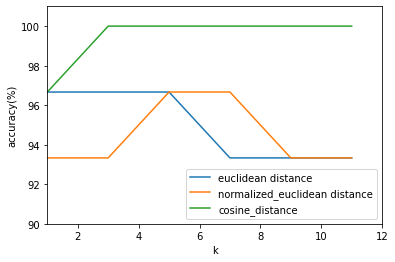

In [126]:
import matplotlib.pyplot as plt

x = range(1, 12, 2)
plt.plot(x, euc)
plt.plot(x, nor)
plt.plot(x, cos)
plt.xlim((1, 12))
plt.ylim((90,101))
plt.xlabel('k')
plt.ylabel('accuracy(%)')
plt.legend(['euclidean distance', 'normalized_euclidean distance', 'cosine_distance'], loc='lower right')
plt.show()

In [127]:
# optimal hyperparameter: k = 5
# euclidean distance
correct_euc5 = 0
accuracy_euc5 = 0
for i in range(len(testSet)):
    result = kNN_euc_distance(devSet, testSet[i], 5)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_euc5 += 1
accuracy_euc5 = correct_euc5/len(testSet) * 100
print(str(accuracy_euc5) + '%')

# normalized_euclidean distance
correct_nor5 = 0
accuracy_nor5 = 0
for i in range(len(testSet)):
    result = kNN_normalized_euclidean(devSet, testSet[i], 5)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_nor5 += 1
accuracy_nor5 = correct_nor5/len(testSet) * 100
print(str(accuracy_nor5) + '%')

# cosine_distance
correct_cos5 = 0
accuracy_cos5 = 0
for i in range(len(testSet)):
    result = kNN_cos_similarity(devSet, testSet[i], 5)
    res = voteResult(result)
    if res == testSet[i].split()[4]:
        correct_cos5 += 1
accuracy_cos5 = correct_cos5/len(testSet) * 100
print(str(accuracy_cos5) + '%')

96.66666666666667%
96.66666666666667%
100.0%
